## Title: Bike-sharing rental process

### Project Member's Name:
Mohamed Shafeeq VP

Sonali Kundu

Loh Xiao Tong

### Project Code: PRCP-1018-BikeRental

In [21]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Businesscase:- Predication of bike rental count hourly based on the environmental and seasonal settings
#### Regression 

In [22]:
## read the dataset
data=pd.read_csv('hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Basic Checks

In [88]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1.0,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1.0,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1.0,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1.0,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1.0,0.24,0.2879,0.75,0.0,0,1,1


In [60]:
data.tail(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [61]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
data.describe(include='O')

,dteday
count,17379
unique,731
top,2011-03-26
freq,24


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Basic Understanding of Features --> Domain Analysis
 hour.csv has the following fields,
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Exploratory Data Analysis

### Univariate Analysis: Analysing one variable at a time

In [8]:
import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights From Mohamed Shafeeq VP
Insights

1)Month: Most data points lie in the month 1 and 12.

2)Holiday: More data lies in non holiday.

3)Workingday: More data points lies in working day.

4)Weather: Clear weather has more data points.

5)Temperature: It seems to be almost normal distribution.

6)atemp: Data seems to be left skewed.

7)hum: Data seems to be left skewed.

8)windspeed, casual, registered and cnt: Data seems to be right skewed.


## Bivariate Analysis -- Analyzing 2 variables at a time

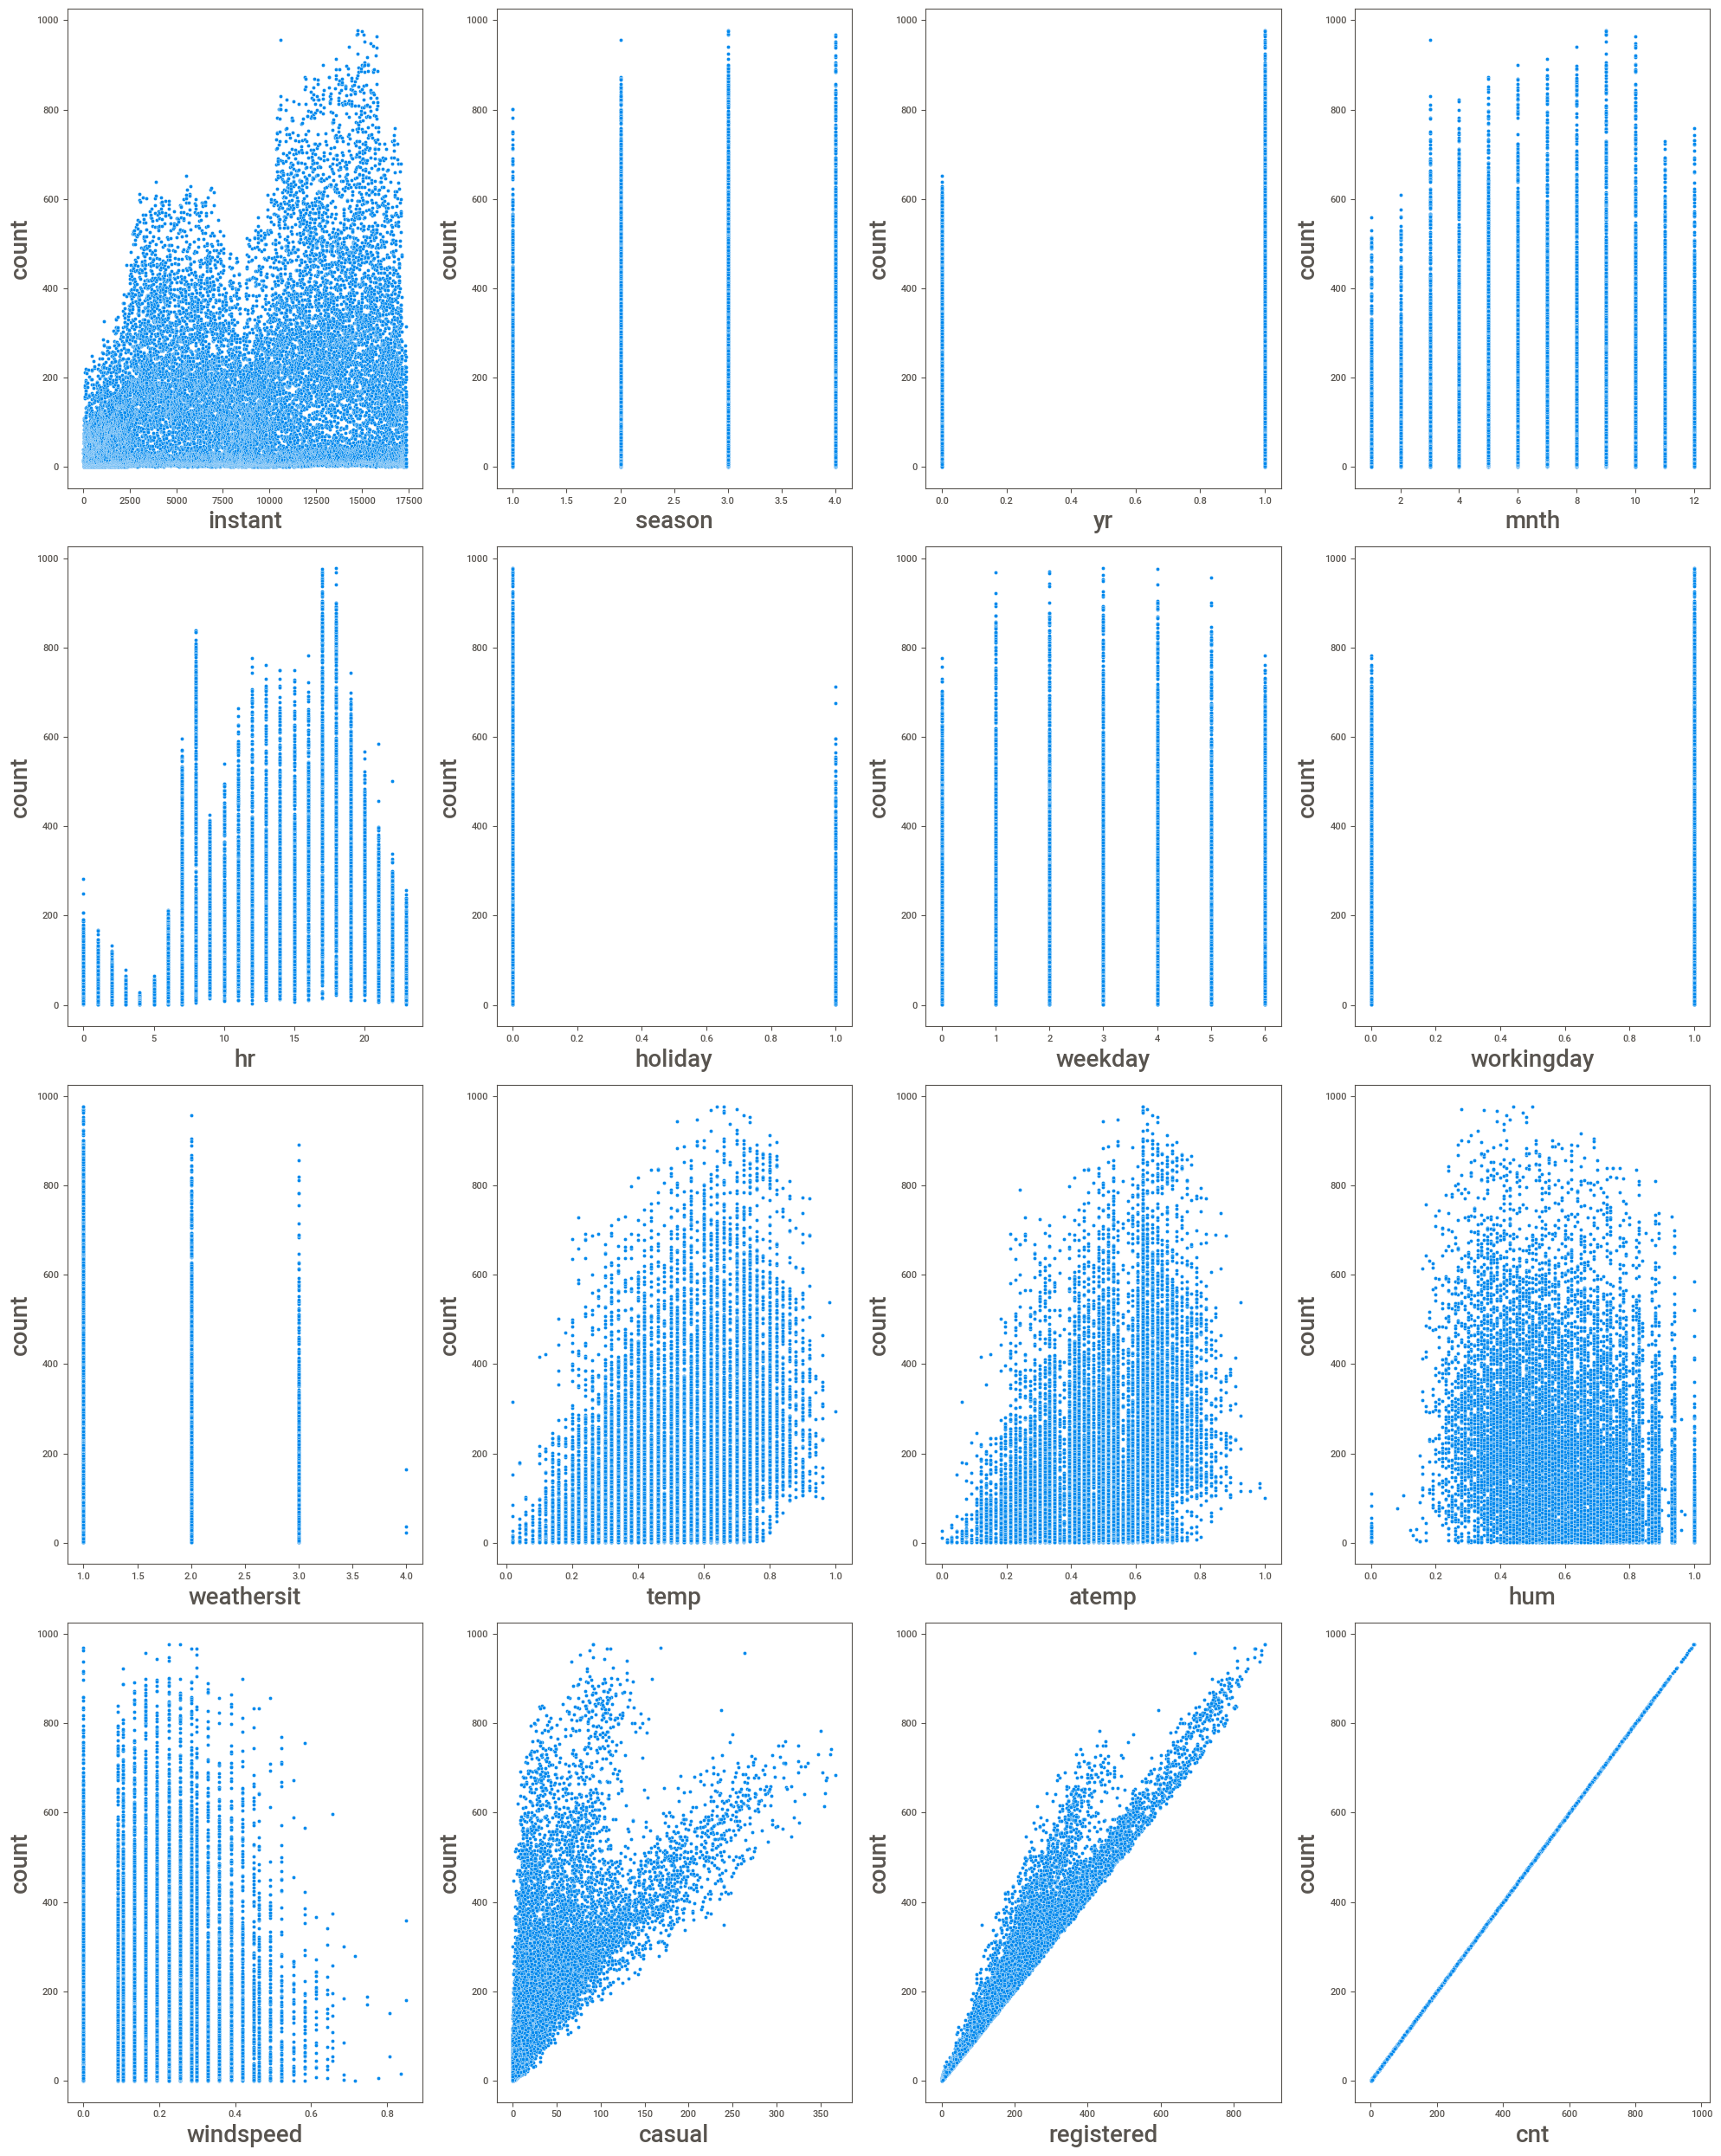

In [9]:
data_num=data.drop(['dteday'],axis=1)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=16 :    ## there are 16 columns in the data_num
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data_num[column].dropna(axis=0)
                        ,y=data.cnt)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

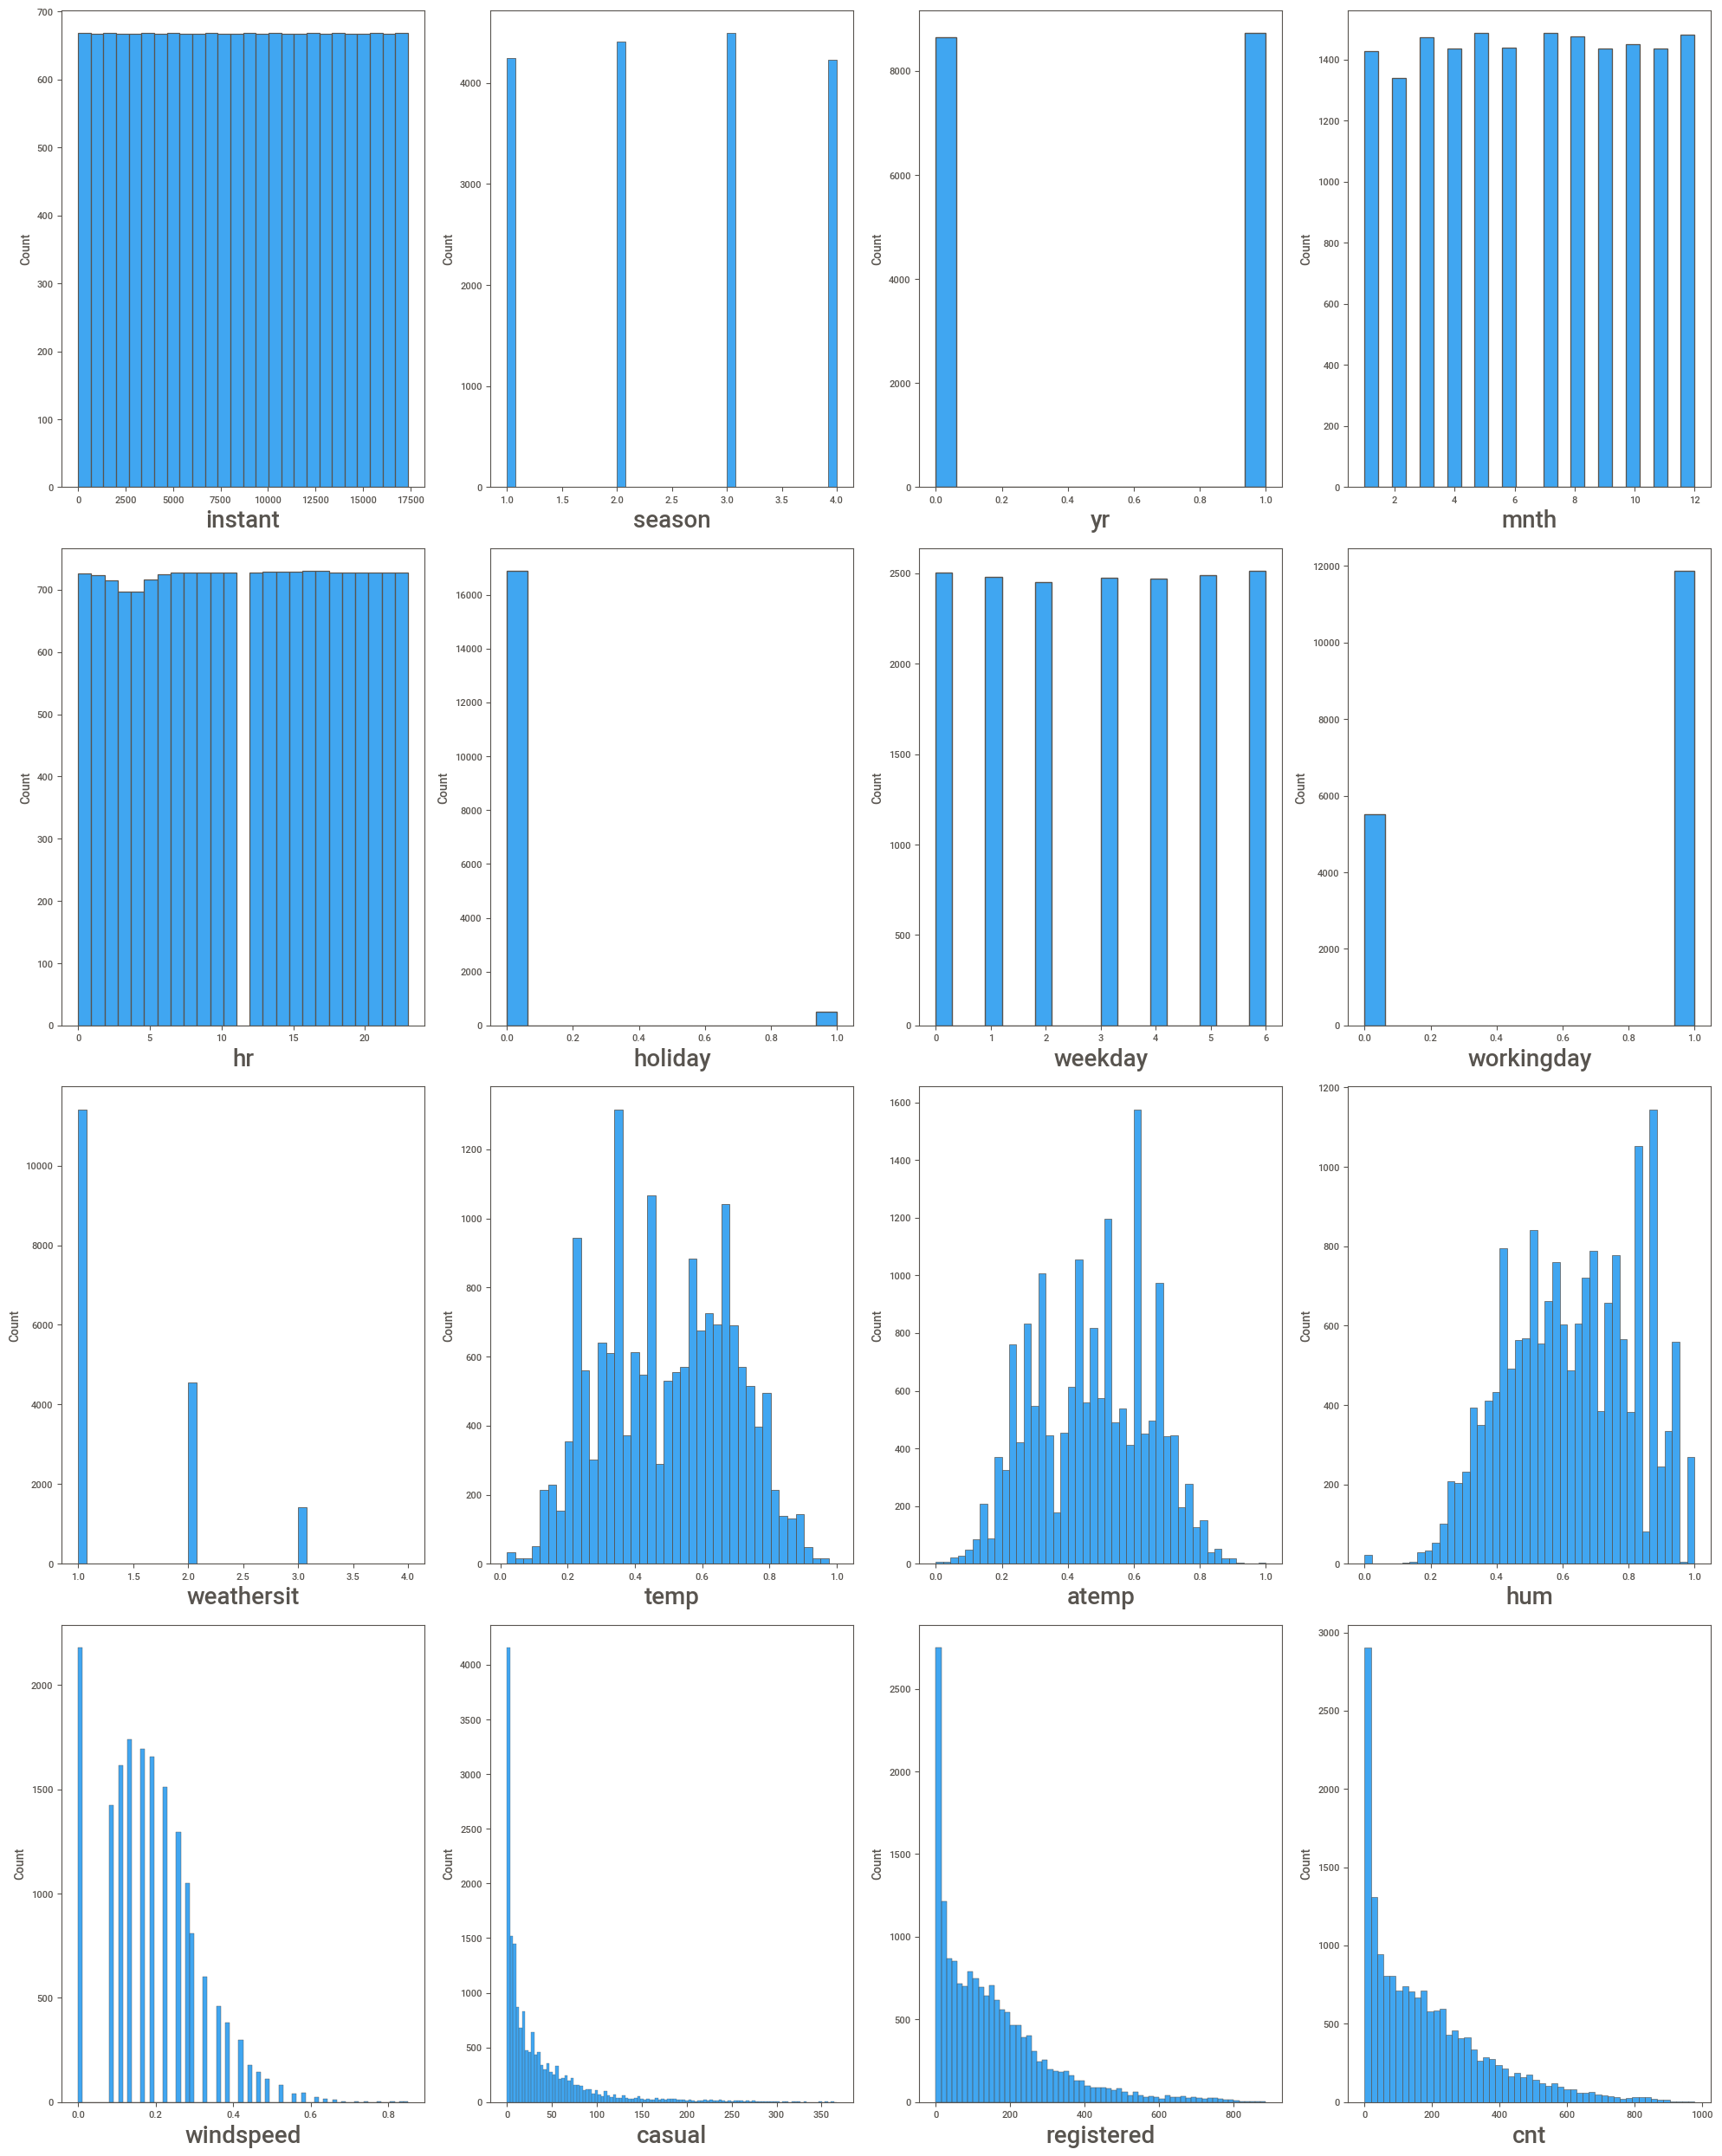

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data_num[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        ##plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

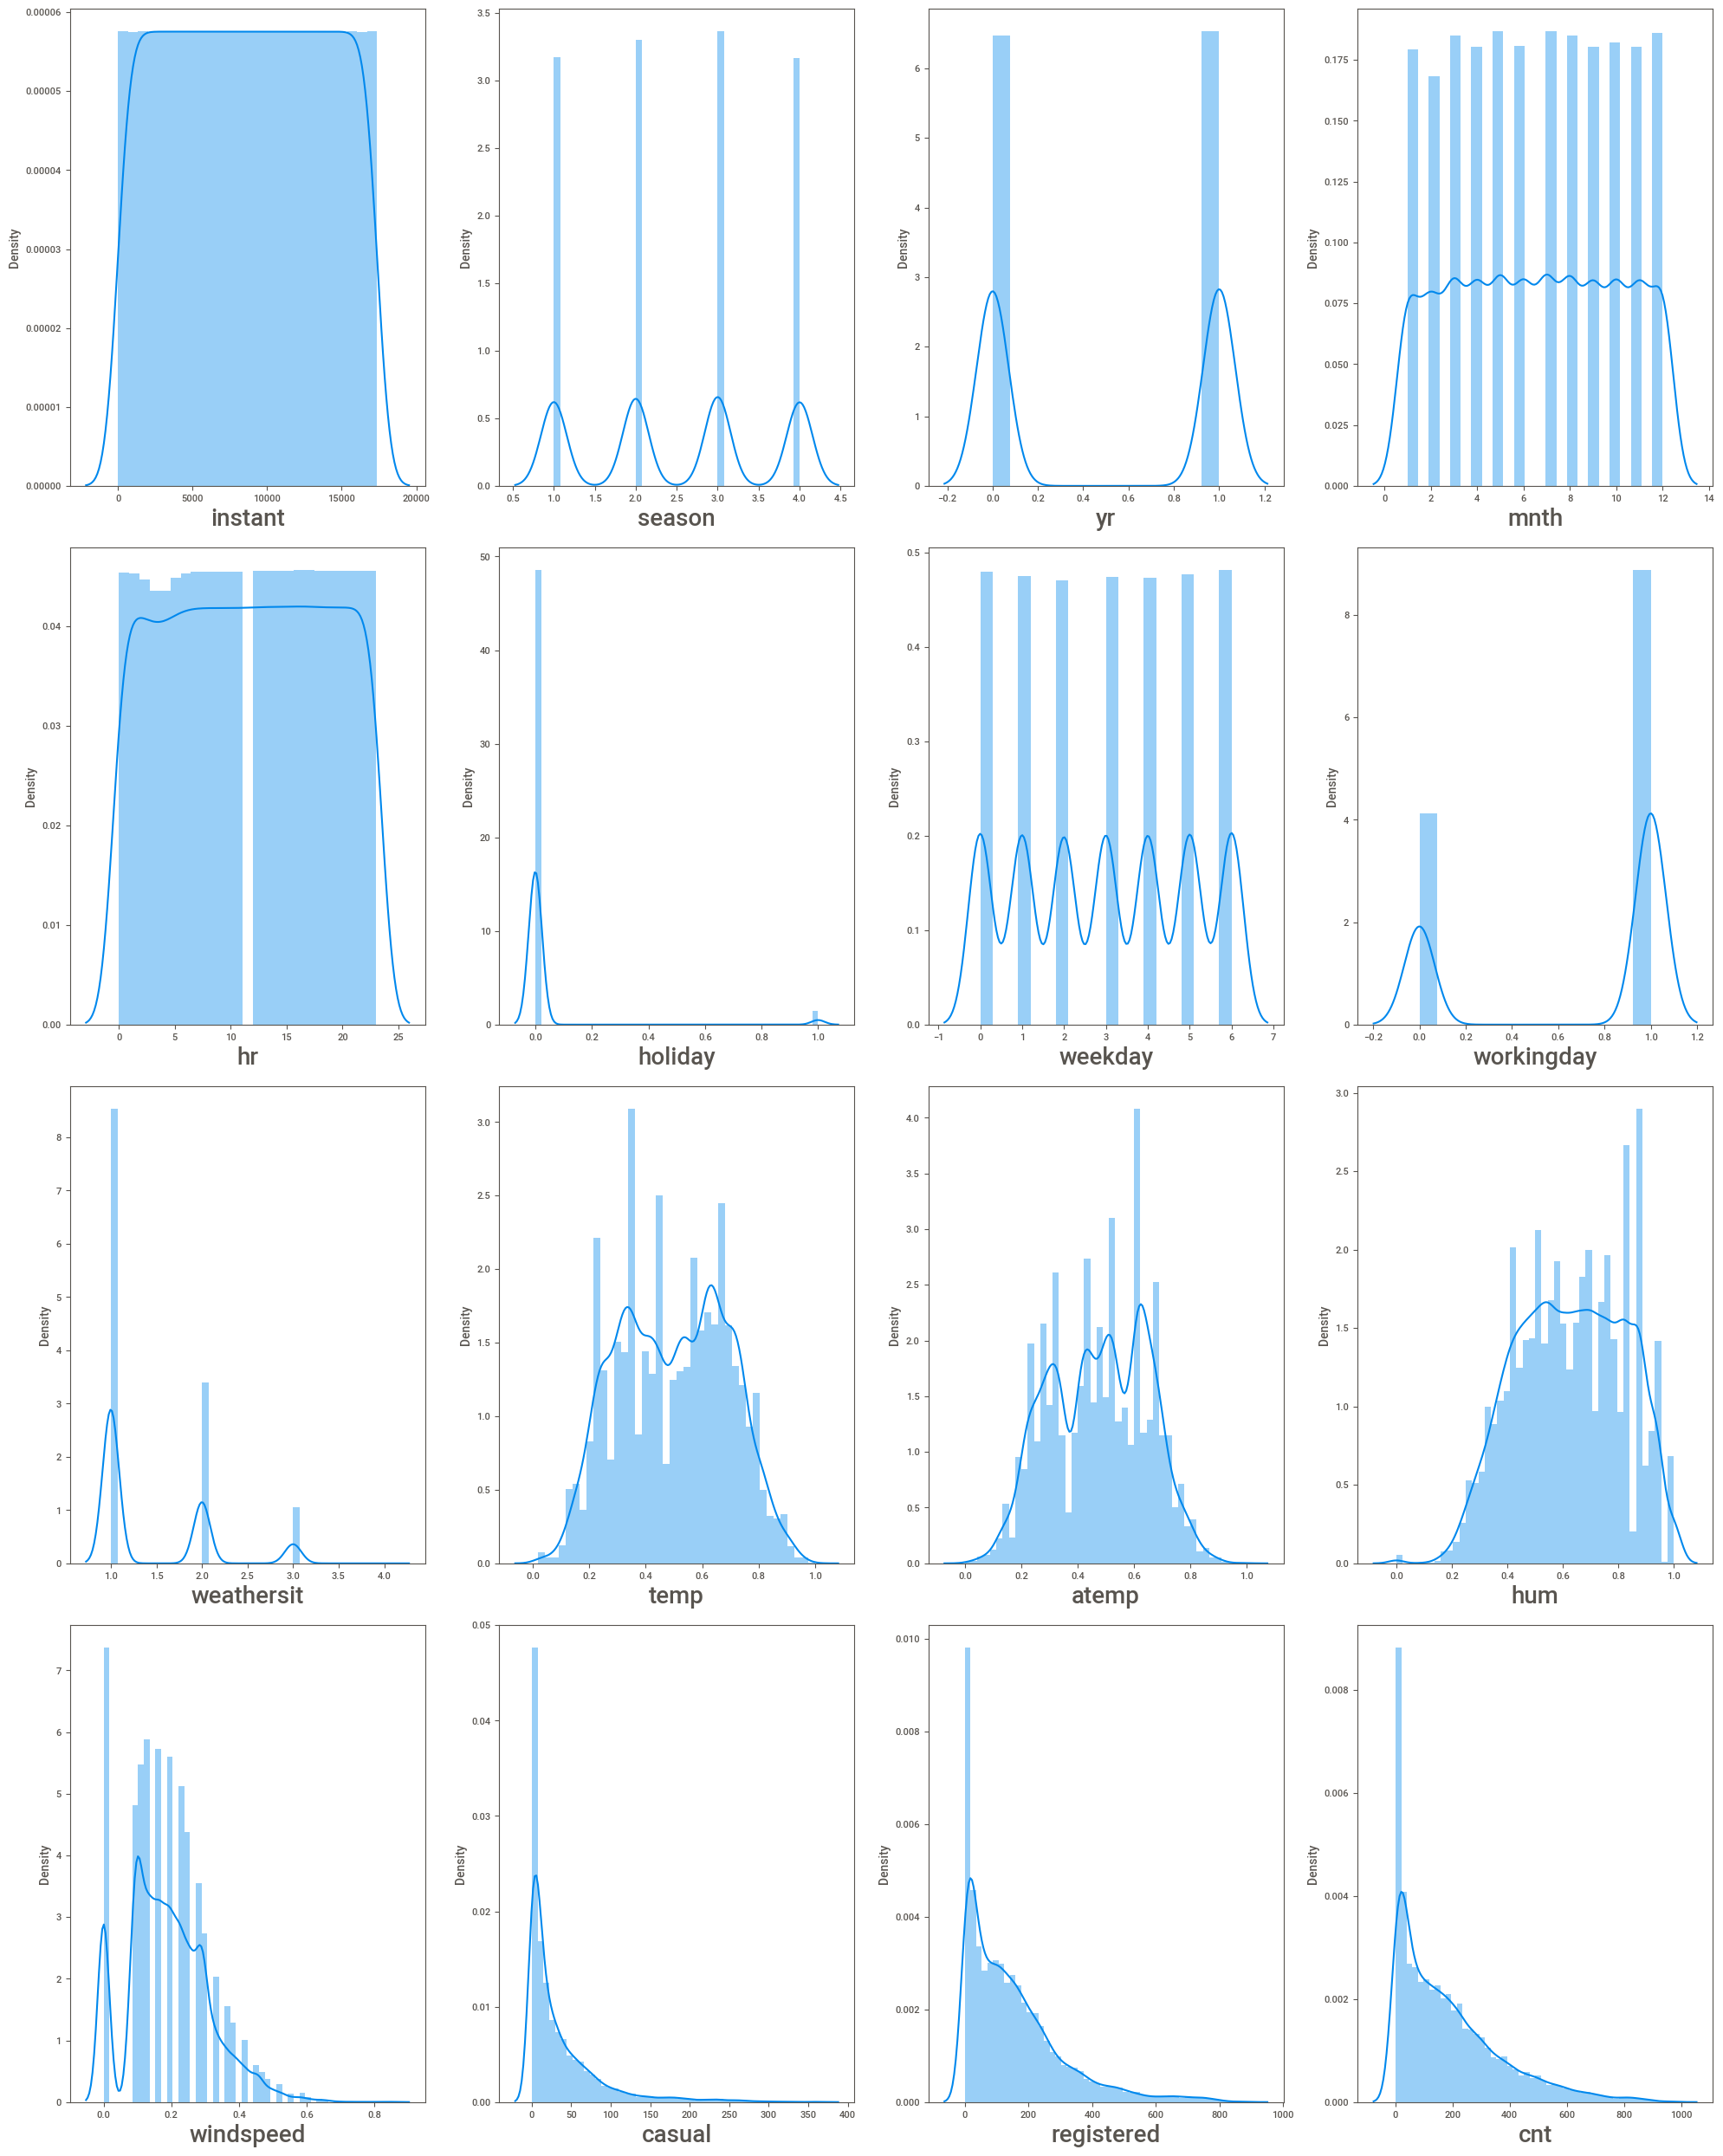

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=17 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data_num[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        ##plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

## Insights From Bivariate Analysis

### Insights from Sonali Kundu
instant: It is a record index, it is unique Id feature type.from the graph we can say that from 0 to 17378 instant is there.

season:In this dataset there are 4 types of seasons. (1:springer, 2:summer, 3:fall, 4:winter). From the graph we can say that for almost every type of season bike rental amount is more or less same. For season:3 it is slighly high among all of them.

yr:This dataset contains data for two consicutive years i.e. year (0: 2011, 1:2012). From the graph we can see that bike rental count for two both years are almost same. But from scatterplot we can see that in the year 2012, more people took bike on rent than 2011.

mnth:In this dataset this column says the count of on which month(1 to12) of the particular year, people took bike on rent. from the scatterplot we can say that among all 12 months, on 9th and 10th month(September and October) most of the people took bike on rent.

hour: This feature says that on what time of the day people take bike for rent. we know that every day consists of hour (0 to 23). So, from the scatterplot we can see that around 8 A.M. (8) and 5 p.m.(17) and 6 p.m(18) most of the people hire bikes, so we can conclude that as those times are like office or school starting(8 A.M.) and closing hours(5 or 6 P.M.) so most of the people take bike on rental.

holiday: In the dataset this feature says tht weather day is holiday or not on which bike was rented. Here 0 denotes the day is not holiday and 1 denotes the day was holiday. So, from the scatter plot we can say that most of the people are taking bikes on rent on the non-holiday(0) days, less people take bikes on rent on holiday(0).

weekday: In the dataset this feature says the day of the week(sunday to saturday) on which bikes were taken on rent. From the scatterplot we can see that from Monday(1) to Friday(5) bikes were taken on rent most as these are working days and less bikes were rented on Sunday(0) and Saturday(6) as these are weekend.

workingday : if day is neither weekend nor holiday is 1, otherwise is 0. So from the scatterPlot we can see that most of the people took bike on rent on the workingday:1 i.e. on those days when offices, schols and other organisations are mostly remain opened.

weathersit:In this feature there are 4 type of unique attribute, they are as following:
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        From the above histplot we can see that for weathersit 1, the count is most, i.e. most of the people taking bike on rent on 1: Clear, Few clouds, Partly cloudy, Partly cloudy weather.
        And when the weathersit:3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds less people takibg bike on rent. So we can say that if weather is rainy or snowy very less people goes out so for that very less people take bikes on rent.This feature is important for this dataset.
      
temp: Normalized temperature in Celsius. The values are divided to 41 (max).  From the Distplot we can see that when temp is in range between 0.25 to 0.7 most of the people taking bike on rent.

atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max). It is very similar or we can say highly correlated to temp.

hum:Normalized humidity. The values are divided to 100 (max). From the graph we can see that most of the people hiring bike on rent when humidity's range is between 0.3 to 0.9.

windspeed: Normalized wind speed. The values are divided to 67 (max). From the graph we can say that when windspeed is between 0.1 to 0.3 most of the people taking bike on rent, when windspeed is more than 0.3 count of hiring bike is decreasing.

casual:This feature indicates count of casual users.count of casual users are between 0 to 100, it is very less than regestered users.

registered: This feature indiactes count of registered users. It is almost same like total count. registered users count is between 0 to 800. registered users hires more bikes than casual users.

cnt: It is our target variable in this dataset, it indicates count of total rental bikes including both casual and registered. It is between 0 to 1000.
      
      
### Insights from Loh Xiao Tong


People prefer to rent in the weather  Clear, Few clouds, Partly cloudy, Partly cloudy and fall is the most popular season.

The demand of bike rental increased in 2012 .

People rented a bike increased monthly,but decreased in nov ,dec
From mon to fri,the demand higher than weekend.

The demand increase at 8am and 18pm(before and after working hours).

The demand of bike in working day was higher .

temp and atemp had similiar trend ,when ,more people would choose bike as transportation.

People prefer to use bike when the humidity, temperature increase and the wind speed decrease.

### Insights From Mohamed Shafeeq VP

Insights
1)Date: The count increases towards the end of the year in both 2011 and 2012, the count is low in the first months. The 2012 is higher than the previous year.

2)Season: The highest count is obtained in fall season and lowest is obtained in springer.

3)Year: 2012 has the highest count.

4)Month: The count increases gradually from january to October and then shows a decline in the count. The highest count is seen in the month of October and lowest in January.

5)Hour: The count is high in between 5 to 7 pm. From morning 5 am to night 8 pm it shows a linear trend and after shows a decline in the count.

6)Holidays: Non holidays have more customers.

7)Weekday: Saturday and Sunday has less count compared to Monday to Friday.

8)Workingday: Working day is having more count compared to holiday.

9)weather: When the weather is Clear, Few clouds and Partly cloudy the count is maximum. The count shows a considerable fall when the wheather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

10)temperature and feeling temperature: When the temperature is getting warmer the count increases, it shows a linear relationship.

11)wind speed: When the wind speed increases the count decreases considerably, count and wind speed shows an inverse relationship.

12)casual: When the count of casual users increases the total count also increases. It shows a linear relationship.

13)registered:When the count of registered users increases the total count also increases. It shows a linear relationship.


In [4]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=[5,5]##Validating functions are defined and associated with rc parameters in:mod:`matplotlib.rcsetup`.
sns.set_style('darkgrid')

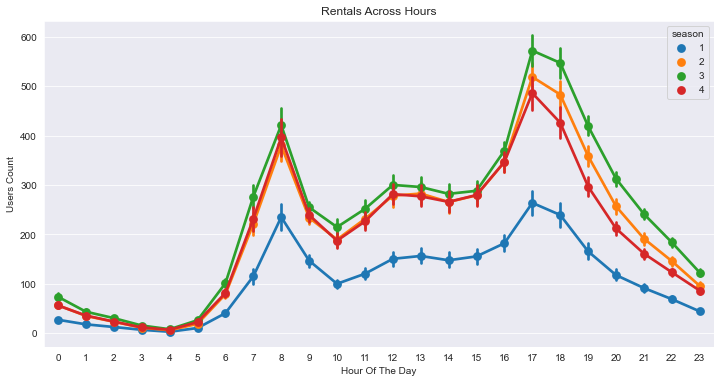

In [6]:
plt.figure(figsize=(12, 6))
sns.pointplot(x=data["hr"], y=data["cnt"], hue=data["season"])
plt.xlabel("Hour Of The Day")
plt.ylabel("Users Count") 
plt.title("Rentals Across Hours")
plt.show()

In [7]:
1:springer, 2:summer, 3:fall, 4:winter

SyntaxError: invalid syntax (<ipython-input-7-a50b3ea1bb37>, line 1)

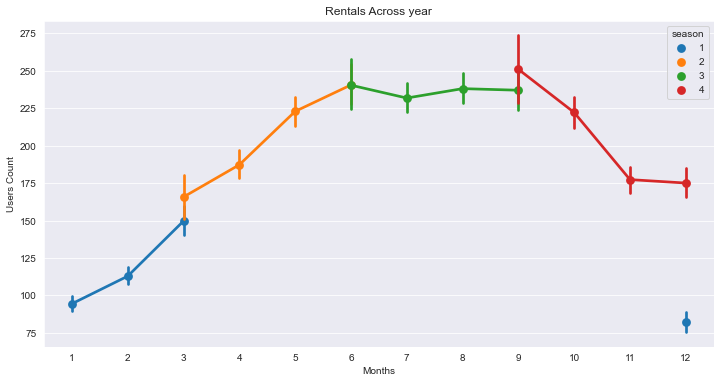

In [8]:
plt.figure(figsize=(12, 6))
sns.pointplot(x=data["mnth"], y=data["cnt"], hue=data["season"])
plt.xlabel("Months")
plt.ylabel("Users Count") 
plt.title("Rentals Across year")
plt.show()

## Data Preprocessing

In [13]:
## get the missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
## No missing values are there to handle.

In [15]:
## There is one categorical Feature need to convert them to numerical equvalent

In [18]:
data.dteday.value_counts()

719    24
357    24
485    24
469    24
453    24
       ..
25     16
17     12
668    11
26      8
667     1
Name: dteday, Length: 731, dtype: int64

In [89]:
## Converting the numerical equivalent
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['dteday']=le.fit_transform(data['dteday'])

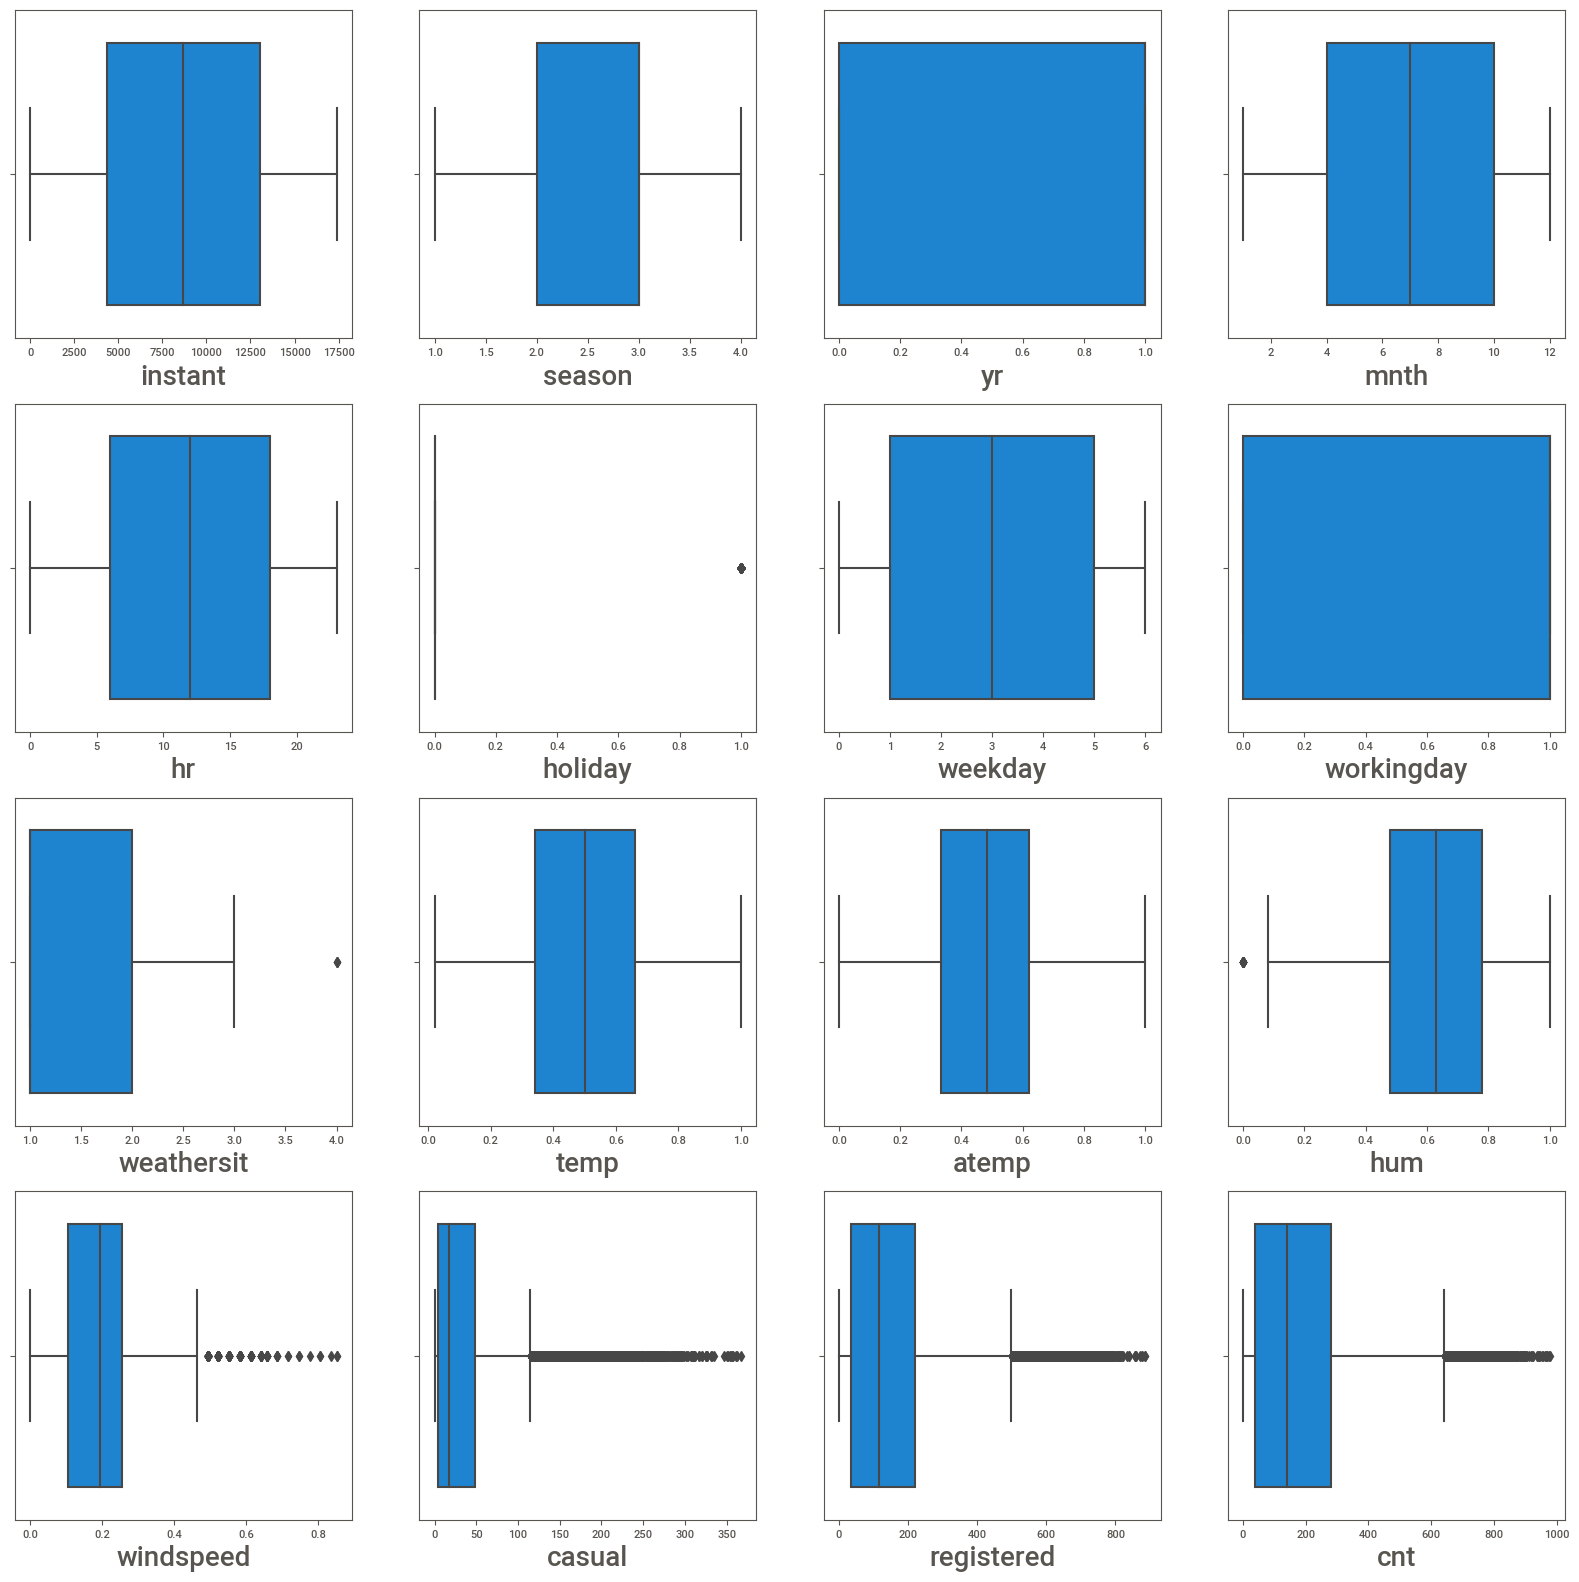

In [63]:
## Lets check outliers in any
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=16 :  
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data_num[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [26]:
## windspeed,casual,registered,cnt have outliers more than5%, so for these features no outlier treatment is required.
##Holiday,weathersit,hum required outlier treatment.

In [31]:
##Handling the outliers
data.holiday.value_counts()
    # Interquartile range (IQR) 
    
from scipy import stats
IQR = stats.iqr(data.holiday, interpolation = 'midpoint') 
IQR
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.holiday.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.holiday.quantile(0.75)
 ##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

In [35]:
## filetring the data
data.loc[data['holiday'] >max_limit]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
372,373,16,1,0,1,0,1,1,0,2,0.20,0.1970,0.47,0.2239,1,16,17
373,374,16,1,0,1,1,1,1,0,2,0.20,0.1970,0.44,0.1940,1,15,16
374,375,16,1,0,1,2,1,1,0,2,0.18,0.1667,0.43,0.2537,0,8,8
375,376,16,1,0,1,3,1,1,0,2,0.18,0.1818,0.43,0.1940,0,2,2
376,377,16,1,0,1,4,1,1,0,2,0.18,0.1970,0.43,0.1343,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17230,17231,724,1,1,12,19,1,2,0,2,0.32,0.3030,0.66,0.2239,16,20,36
17231,17232,724,1,1,12,20,1,2,0,2,0.32,0.3030,0.66,0.2836,11,29,40
17232,17233,724,1,1,12,21,1,2,0,2,0.30,0.2879,0.65,0.1940,8,26,34
17233,17234,724,1,1,12,22,1,2,0,2,0.30,0.3030,0.70,0.1642,3,16,19


In [36]:
data.loc[data['holiday'] <min_limit]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [58]:
## No outlier treatment for holiday is required, as it is more than 5%

In [23]:
##Handling the outliers
data.weathersit.value_counts()
    # Interquartile range (IQR) 
    
from scipy import stats
IQR = stats.iqr(data.weathersit, interpolation = 'midpoint') 
IQR
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.weathersit.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.weathersit.quantile(0.75)
 ##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

In [24]:
## filetring the data
data.loc[data['weathersit'] >max_limit]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


In [42]:
data.loc[data['weathersit'] <min_limit]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [25]:
# imputing the outliers as the count is high
data.loc[data['weathersit'] > max_limit,'weathersit']=np.median(data.weathersit)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weathersit'>

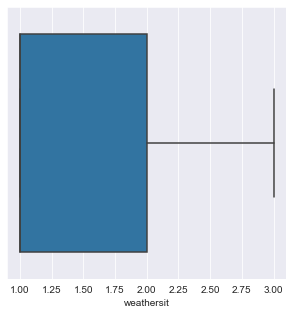

In [26]:
sns.boxplot(data.weathersit)

In [27]:
##Handling the outliers
data.hum.value_counts()
    # Interquartile range (IQR) 
    
from scipy import stats
IQR = stats.iqr(data.hum, interpolation = 'midpoint') 
IQR
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.hum.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.hum.quantile(0.75)
 ##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

In [69]:
## filetring the data
data.loc[data['hum'] >max_limit]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [28]:
data.loc[data['hum'] <min_limit]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3.0,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3.0,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3.0,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3.0,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3.0,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3.0,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3.0,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3.0,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3.0,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3.0,0.40,0.4091,0.0,0.2537,6,5,11


In [48]:
data.hum.value_counts()

0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.10      1
0.91      1
0.13      1
0.97      1
0.12      1
Name: hum, Length: 89, dtype: int64

In [29]:
# imputing the outliers as the count is high
data.loc[data['hum'] < min_limit,'hum']=np.median(data.hum)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

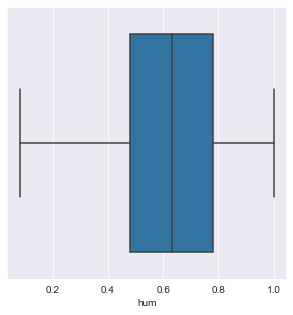

In [30]:
sns.boxplot(data.hum)

## Feature Selection

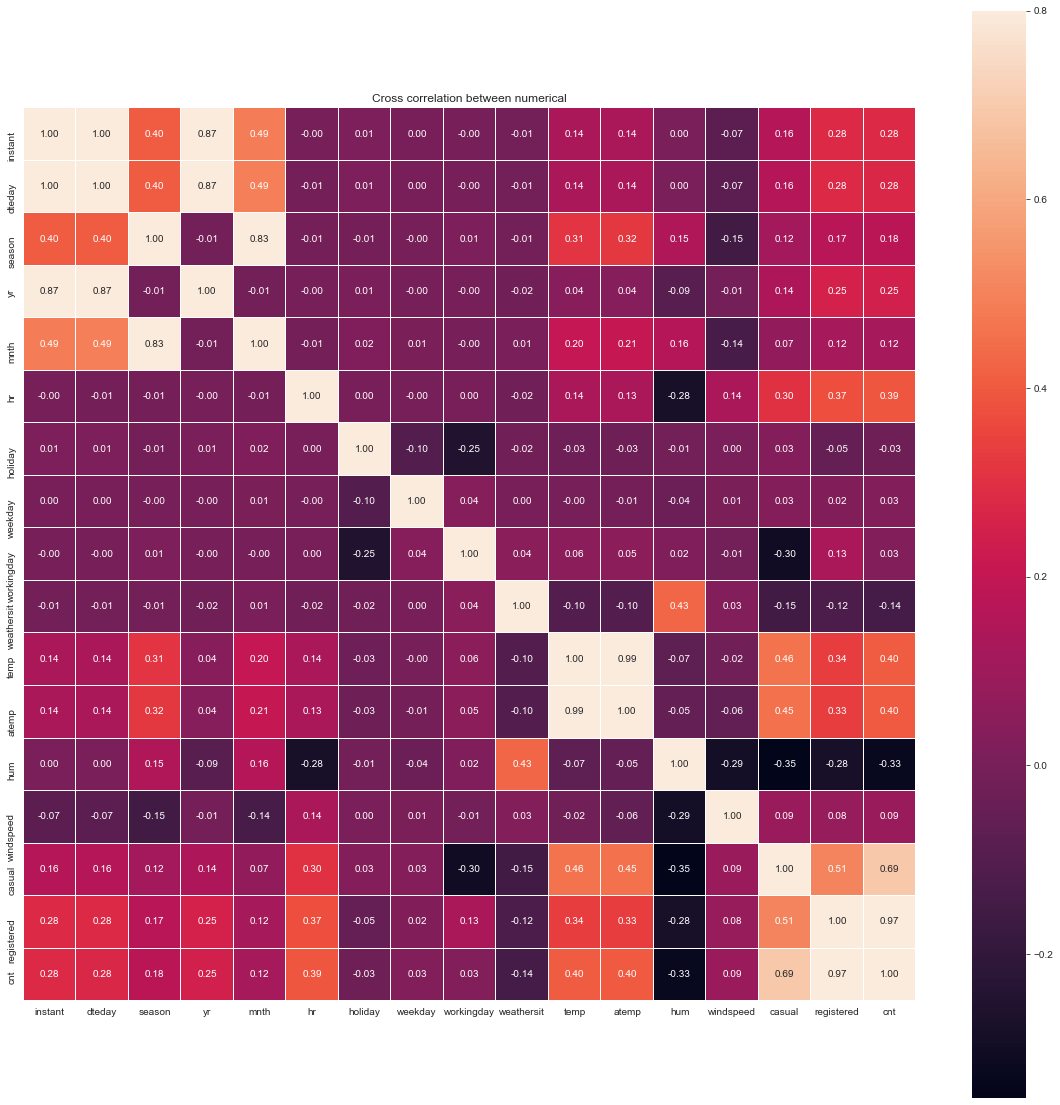

In [90]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()
## instant and dteday are highly correlated to each other,we need to drop one of them
## temp and atemp are highly correlated to each other, we need to drop one of them.
## registered and cnt are highly correlated to each other, we need to drop one of them.

In [32]:
data2 = data.drop(['dteday','temp','registered'],axis=1)
data2.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,cnt
0,1,1,0,1,0,0,6,0,1.0,0.2879,0.81,0.0,3,16
1,2,1,0,1,1,0,6,0,1.0,0.2727,0.80,0.0,8,40
2,3,1,0,1,2,0,6,0,1.0,0.2727,0.80,0.0,5,32
3,4,1,0,1,3,0,6,0,1.0,0.2879,0.75,0.0,3,13
4,5,1,0,1,4,0,6,0,1.0,0.2879,0.75,0.0,0,1


In [55]:
## checking the duplicate rows
data2.duplicated().sum()

0

In [87]:
## checking the constant features
data2.describe()
## the standard deviation of all features are not 0 ,so the there are constant features in the dataset.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.424766,0.475775,0.628026,0.190098,35.676218,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.638486,0.171850,0.191633,0.122340,49.305030,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.080000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.333300,0.480000,0.104500,4.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.484800,0.630000,0.194000,17.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.621200,0.780000,0.253700,48.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,0.850700,367.000000,977.000000


In [33]:
## Here in this dataset instant is unique id feature let's drop it
data3 = data2.drop(['instant'],axis=1)
data3.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,cnt
0,1,0,1,0,0,6,0,1.0,0.2879,0.81,0.0,3,16
1,1,0,1,1,0,6,0,1.0,0.2727,0.80,0.0,8,40
2,1,0,1,2,0,6,0,1.0,0.2727,0.80,0.0,5,32
3,1,0,1,3,0,6,0,1.0,0.2879,0.75,0.0,3,13
4,1,0,1,4,0,6,0,1.0,0.2879,0.75,0.0,0,1


## Model Creation

In [43]:
## Definig independent and dependent variables
X=data3.iloc[:,0:-1]
y=data3.cnt

In [44]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)

In [45]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=42)

### Linear Regression Model

In [46]:
## Model creation
from sklearn.linear_model import LinearRegression ## importing the model library 

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.
y_hat=LR.predict(X_test) ## prediciton from model

In [38]:
y_hat

array([576.64300992, 113.37904385,  85.2807774 , ...,   4.38781114,
       289.14021471, 181.71850857])

In [47]:
## Model Evaluation
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.6114214392324802

In [48]:
test_score=r2_score(y_test,y_hat)
test_score

0.6044296586652902

In [49]:
X_train.shape,X_test.shape

((13903, 12), (3476, 12))

In [50]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.61)*(13903-1)/(13903-12-1)
train_adjusted_r2

0.6096630669546437

In [51]:
test_adjusted_r2= 1-(1-0.60)*(3476-1)/(3476-12-1)
test_adjusted_r2

0.5986139185677158

In [53]:
print('intercept:', LR.intercept_) ## c value

intercept: 189.9298707393616


In [52]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

slope: [ 18.86311121  29.08885762   0.45607129  33.27964064   1.04476852
  -0.29706851  40.7556558   -4.51171793   5.39469968  -7.70292397
   3.40229007 115.47491665]


## KNN Model

In [54]:
### creating 2nd model
from sklearn.neighbors import KNeighborsRegressor
modelknn = KNeighborsRegressor()
modelknn.fit(X_train,y_train)
y_hat2=modelknn.predict(X_test)

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
scores = cross_val_score(modelknn,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.46203742 0.64646916 0.69562832]
Cross validation Score: 0.6013783010216195
Std : 0.10055203271748989


In [56]:
error_rate=[]
for i in range(1,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

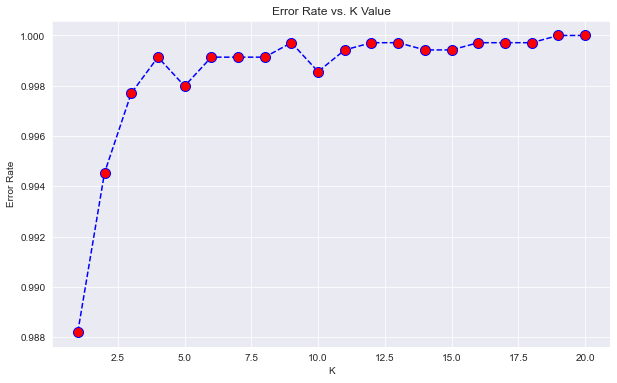

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [58]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.7436052688613082

In [1]:
adj_r2_score=1-(1-0.74)*(13903-1)/(13903-12-1)
adj_r2_score

0.7397753779697624

### Decision Tree Model

In [61]:
from sklearn.tree import DecisionTreeRegressor
dt_r=DecisionTreeRegressor()
dt_r.fit(X_train,y_train)
y_hat_dt=dt_r.predict(X_test)

In [62]:
y_train_predict=dt_r.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

1.0

In [63]:
## test acc
test_score=r2_score(y_test,y_hat_dt)
test_score

0.927856869978613

In [64]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-1.0)*(13903-1)/(13903-12-1)
train_adjusted_r2

1.0

In [65]:
test_adjusted_r2= 1-(1-0.92)*(3476-1)/(3476-12-1)
test_adjusted_r2

0.9197227837135432

In [95]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_rgr = DecisionTreeRegressor(random_state=3)
tree_cv = GridSearchCV(tree_rgr, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


C:\Users\Ariya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


KeyError: 'gini'

### Random Forest Model

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_rgr = RandomForestRegressor(n_estimators=100)
rf_rgr.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
y_predict=rf_rgr.predict(X_test)

In [68]:
y_train_predict=rf_rgr.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.9952106251018784

In [69]:
## test acc
test_score=r2_score(y_test,y_predict)
test_score

0.962217444241117

In [70]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.99)*(13903-1)/(13903-12-1)
train_adjusted_r2

0.9899913606911447

In [71]:
test_adjusted_r2= 1-(1-0.96)*(3476-1)/(3476-12-1)
test_adjusted_r2

0.9598613918567716

### Gradiant Boosting Model

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_pred5=gbm.predict(X_test)

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred5)

0.913080318161886

In [85]:
adj_r2_score=1-(1-0.91)*(13903-1)/(13903-12-1)
adj_r2_score

0.9099222462203024

In [86]:
test_adjusted_r2= 1-(1-0.91)*(3476-1)/(3476-12-1)
test_adjusted_r2

0.9096881316777361

In [83]:
X_train.shape,X_test.shape

((13903, 12), (3476, 12))

### XG Boost Model

In [102]:
## Installing XGB library
!pip3 install xgboost

In [103]:
import xgboost

In [72]:
## model creation
from xgboost import XGBRegressor
xgb_r=XGBRegressor()
xgb_r.fit(X_train,y_train)
y_hat=xgb_r.predict(X_test)

In [73]:
r2_score(y_test,y_hat)

0.9686855696625457

In [79]:
test_adjusted_r2= 1-(1-0.97)*(3476-1)/(3476-12-1)
test_adjusted_r2

0.9698960438925787

### Bagging Model

In [75]:
## using Bagging
from sklearn.ensemble import BaggingRegressor
model_bagg=BaggingRegressor(base_estimator=xgb_r,n_estimators=10) ## model objet creation

model_bagg.fit(X_train,y_train) ## fitting the model
y_hat7=model_bagg.predict(X_test)

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_hat7)

0.9712103620646132

In [80]:
test_adjusted_r2= 1-(1-0.97)*(3476-1)/(3476-12-1)
test_adjusted_r2

0.9698960438925787

Inference: after creating models, we can say that XG Boost and Bagging model are giving higher Accuracy(adjusted r2 score=96.9%) than other models.